Shape: (11000, 19)

Dtypes:
 Age                                    int64
Gender                                object
Occupation                            object
Sleep Hours                          float64
Physical Activity (hrs/week)         float64
Caffeine Intake (mg/day)               int64
Alcohol Consumption (drinks/week)      int64
Smoking                               object
Family History of Anxiety             object
Stress Level (1-10)                    int64
Heart Rate (bpm)                       int64
Breathing Rate (breaths/min)           int64
Sweating Level (1-5)                   int64
Dizziness                             object
Medication                            object
Therapy Sessions (per month)           int64
Recent Major Life Event               object
Diet Quality (1-10)                    int64
Anxiety Level (1-10)                 float64
dtype: object

Head:
    Age  Gender Occupation  Sleep Hours  Physical Activity (hrs/week)  \
0   29  Female     Art

FileNotFoundError: [Errno 2] No such file or directory: 'plots\\eda\\Physical Activity (hrs\\week)_hist.png'

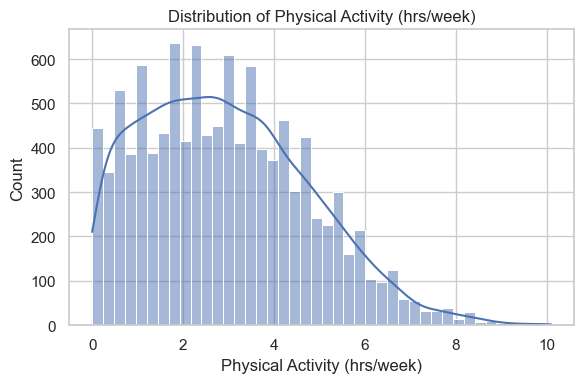

In [2]:
# eda.py
"""
Exploratory Data Analysis for the Anxiety dataset.
Generates summary tables and saves plots to plots/eda/.
"""

import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------------- Settings ----------------
DATA_PATH = "data/anxiety.csv"          # adjust if needed
PLOT_DIR  = Path("plots/eda")
PLOT_DIR.mkdir(parents=True, exist_ok=True)
RANDOM_STATE = 42
sns.set(style="whitegrid", rc={"figure.figsize": (6,4)})

# ---------------- Load ----------------
df = pd.read_csv(DATA_PATH)

# ---------------- Basic summary ----------------
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
print("\nHead:\n", df.head())

# Missing values table
mv = df.isna().sum().to_frame("missing_count")
mv["missing_pct"] = mv["missing_count"] / len(df)
mv.to_csv(PLOT_DIR / "missing_values.csv")
print("\nMissing values saved to missing_values.csv")

# ---------------- Numeric distributions ----------------
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.savefig(PLOT_DIR / f"{col}_hist.png")
    plt.close()

# Boxplots for potential outliers
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.savefig(PLOT_DIR / f"{col}_box.png")
    plt.close()

# ---------------- Categorical counts ----------------
cat_cols = df.select_dtypes(include=["object", "category"]).columns
for col in cat_cols:
    plt.figure()
    order = df[col].value_counts().index
    sns.countplot(x=df[col], order=order)
    plt.title(f"Counts of {col}")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.savefig(PLOT_DIR / f"{col}_count.png")
    plt.close()

# ---------------- Target exploration ----------------
target_col = "Anxiety Level (1-10)"
if target_col in df.columns:
    plt.figure()
    sns.histplot(df[target_col], bins=10, kde=False)
    plt.title("Distribution of Anxiety Level (1-10)")
    plt.tight_layout()
    plt.savefig(PLOT_DIR / "target_hist.png")
    plt.close()

    # Relationship with numeric features
    for col in num_cols.drop(target_col, errors="ignore"):
        plt.figure()
        sns.scatterplot(x=df[col], y=df[target_col], alpha=0.4)
        plt.title(f"{col} vs {target_col}")
        plt.tight_layout()
        plt.savefig(PLOT_DIR / f"{col}_vs_target.png")
        plt.close()

    # Relationship with categorical features
    for col in cat_cols:
        plt.figure(figsize=(7,4))
        sns.boxplot(x=df[col], y=df[target_col])
        plt.title(f"{target_col} by {col}")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.savefig(PLOT_DIR / f"{target_col}_by_{col}.png")
        plt.close()

# ---------------- Correlation heatmap ----------------
if len(num_cols) > 1:
    corr = df[num_cols].corr()
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, cmap="coolwarm", center=0)
    plt.title("Numeric Feature Correlations")
    plt.tight_layout()
    plt.savefig(PLOT_DIR / "corr_heatmap.png")
    plt.close()
    corr.to_csv(PLOT_DIR / "correlation_matrix.csv")

print("\nEDA complete. Plots saved to plots/eda/")
